In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
from sklearn.model_selection import GroupKFold, StratifiedKFold, train_test_split

In [2]:
def plot_gt(df, img_dir):
    fig = plt.figure(figsize=(5 * 5, 5 * 6))
    fig.subplots_adjust(wspace=5.5, hspace=0.5)
    for i, (art_id, gt_attr_name) in enumerate(df.sort_values(by="image_id", ascending=False)[["image_id", "attr_name"]].values[:15]):
        ax = fig.add_subplot(5, 3, i // 3 * 3 + i % 3 + 1)
        im = Image.open(f"{img_dir}/{art_id}")
        ax.imshow(im)
        im.close()
        
        gt_list_half_size = int(len(gt_attr_name)/2)
#         print(list_half_size)

        ax.set_title("image id: {}\ngt: {}".format(art_id, gt_attr_name))

In [3]:
def check_class_distribution(df_all, df_train, df_test, val_fold=0, all_split=False):
    print('Number of classes: ',df_all.attr_name.nunique())
    
    if 'fold' in df_train.columns:
        if all_split:
            df_test['fold'] = 'test'
            df_all_2 = pd.concat([df_train, df_test], axis=0)
            plt.figure(figsize=(8, 4))
            plt.title('All data distribution')
            sn.countplot(y="attr_name", data=df_all_2, hue='fold');
        else:
            plt.figure(figsize=(8, 4))
            plt.title('Train Val distribution')
            sn.countplot(y="attr_name", data=df_train, hue='fold');
            
            plt.figure(figsize=(8, 4))
            plt.title('Test data distribution')
            sn.countplot(y="attr_name", data=df_test);
    else:
        plt.figure(figsize=(8, 4))
        plt.title('All data distribution')
        sn.countplot(y="attr_name", data=df_all);

        plt.figure(figsize=(8, 4))
        plt.title('Train data distribution')
        sn.countplot(y="attr_name", data=df_train[df_train['fold']!=val_fold]);

        plt.figure(figsize=(8, 4))
        plt.title('Valid data distribution')
        sn.countplot(y="attr_name", data=df_train[df_train['fold']==val_fold]);
    
        plt.figure(figsize=(8, 4))
        plt.title('Test data distribution')
        sn.countplot(y="attr_name", data=df_test);

## PETA Dataset

In [4]:
dataset = 'PETA'
version = 5
df_all_peta = pd.read_csv(f'../../data/{dataset}/split/{dataset.lower()}_v{version}.csv')
df_train_peta = pd.read_csv(f'../../data/{dataset}/split/train_v{version}.csv')
df_test_peta = pd.read_csv(f'../../data/{dataset}/split/test_v{version}.csv')

In [5]:
!pwd

/data1/r_suzuki/pipeline/BaseModel/notebooks/classification


In [6]:
train_peta = pd.read_csv('../../data/PETA/split/test_v5.csv', dtype={'image_id': str, 'class_id': str})
num_classes = 6
labels = []
for idx in range(len(train_peta)):
    item = train_peta.iloc[idx]
    target = np.zeros(num_classes)
    for cls in item.class_id.split():
        target[int(cls)] = 1
    labels.append(target)
labels = np.array(labels)
# labels = train_set.label
sample_weight = labels.mean(0)
sample_weight

array([0.49736842, 0.32894737, 0.10236842, 0.06184211, 0.54842105,
       0.45157895])

In [7]:
# description['peta_age_gender'] = ['personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'personalMale', 'personalFemale']

Number of classes:  10


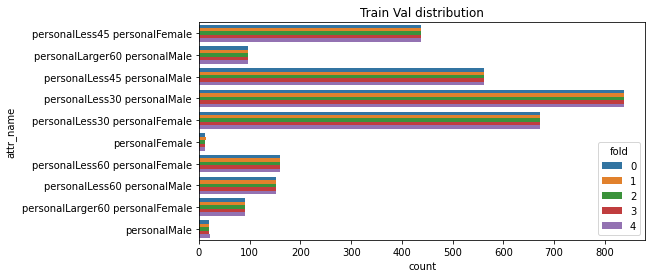

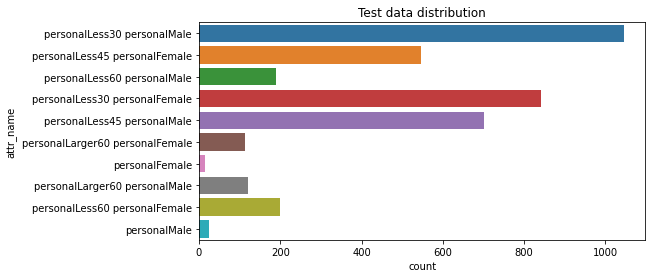

In [8]:
check_class_distribution(df_all_peta, df_train_peta, df_test_peta, val_fold=0)

In [9]:
df_all_peta.attr_name.unique()

array(['personalLess30 personalMale', 'personalLess45 personalMale',
       'personalLess30 personalFemale', 'personalLess45 personalFemale',
       'personalMale', 'personalLess60 personalMale',
       'personalLarger60 personalMale', 'personalLess60 personalFemale',
       'personalLarger60 personalFemale', 'personalFemale'], dtype=object)

In [10]:
def class_num_check(df):
    for name in df.attr_name.unique():
        df_len = len(df[df["attr_name"]==name])
        print(f'{name} : {df_len}')

In [11]:
class_num_check(train_peta)

personalLess30 personalMale : 1046
personalLess45 personalFemale : 547
personalLess60 personalMale : 190
personalLess30 personalFemale : 842
personalLess45 personalMale : 702
personalLarger60 personalFemale : 113
personalFemale : 15
personalLarger60 personalMale : 121
personalLess60 personalFemale : 199
personalMale : 25


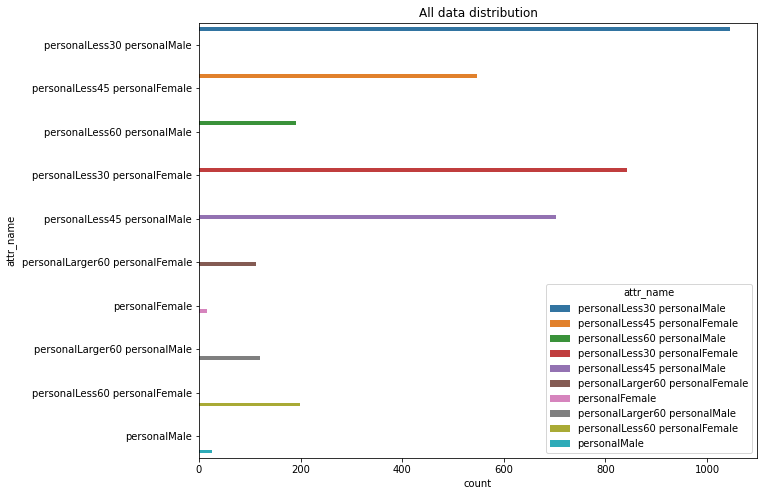

In [12]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="attr_name", data=train_peta, hue='attr_name');

## PA100k Dataset

Number of classes:  6


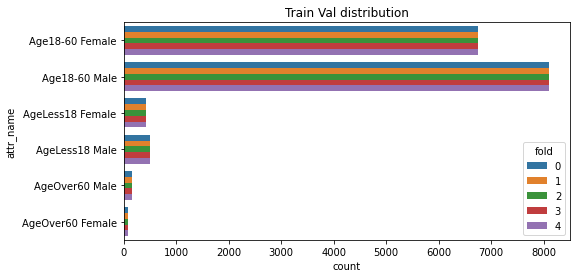

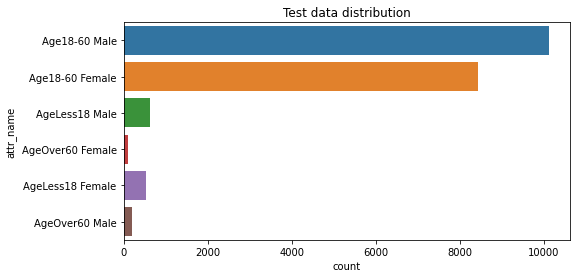

In [13]:
dataset = 'PA100k'
version = 5
df_all_pa100k = pd.read_csv(f'../../data/{dataset}/split/{dataset.lower()}_v{version}.csv')
df_train_pa100k = pd.read_csv(f'../../data/{dataset}/split/train_v{version}.csv')
df_test_pa100k = pd.read_csv(f'../../data/{dataset}/split/test_v{version}.csv')

check_class_distribution(df_all_pa100k, df_train_pa100k, df_test_pa100k, val_fold=0)

In [14]:
df_all_pa100k[df_all_pa100k['class_id'].isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

In [15]:
df_train_pa100k[df_train_pa100k['fold'].isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

In [16]:
df_test_pa100k[df_test_pa100k.attr_name.isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

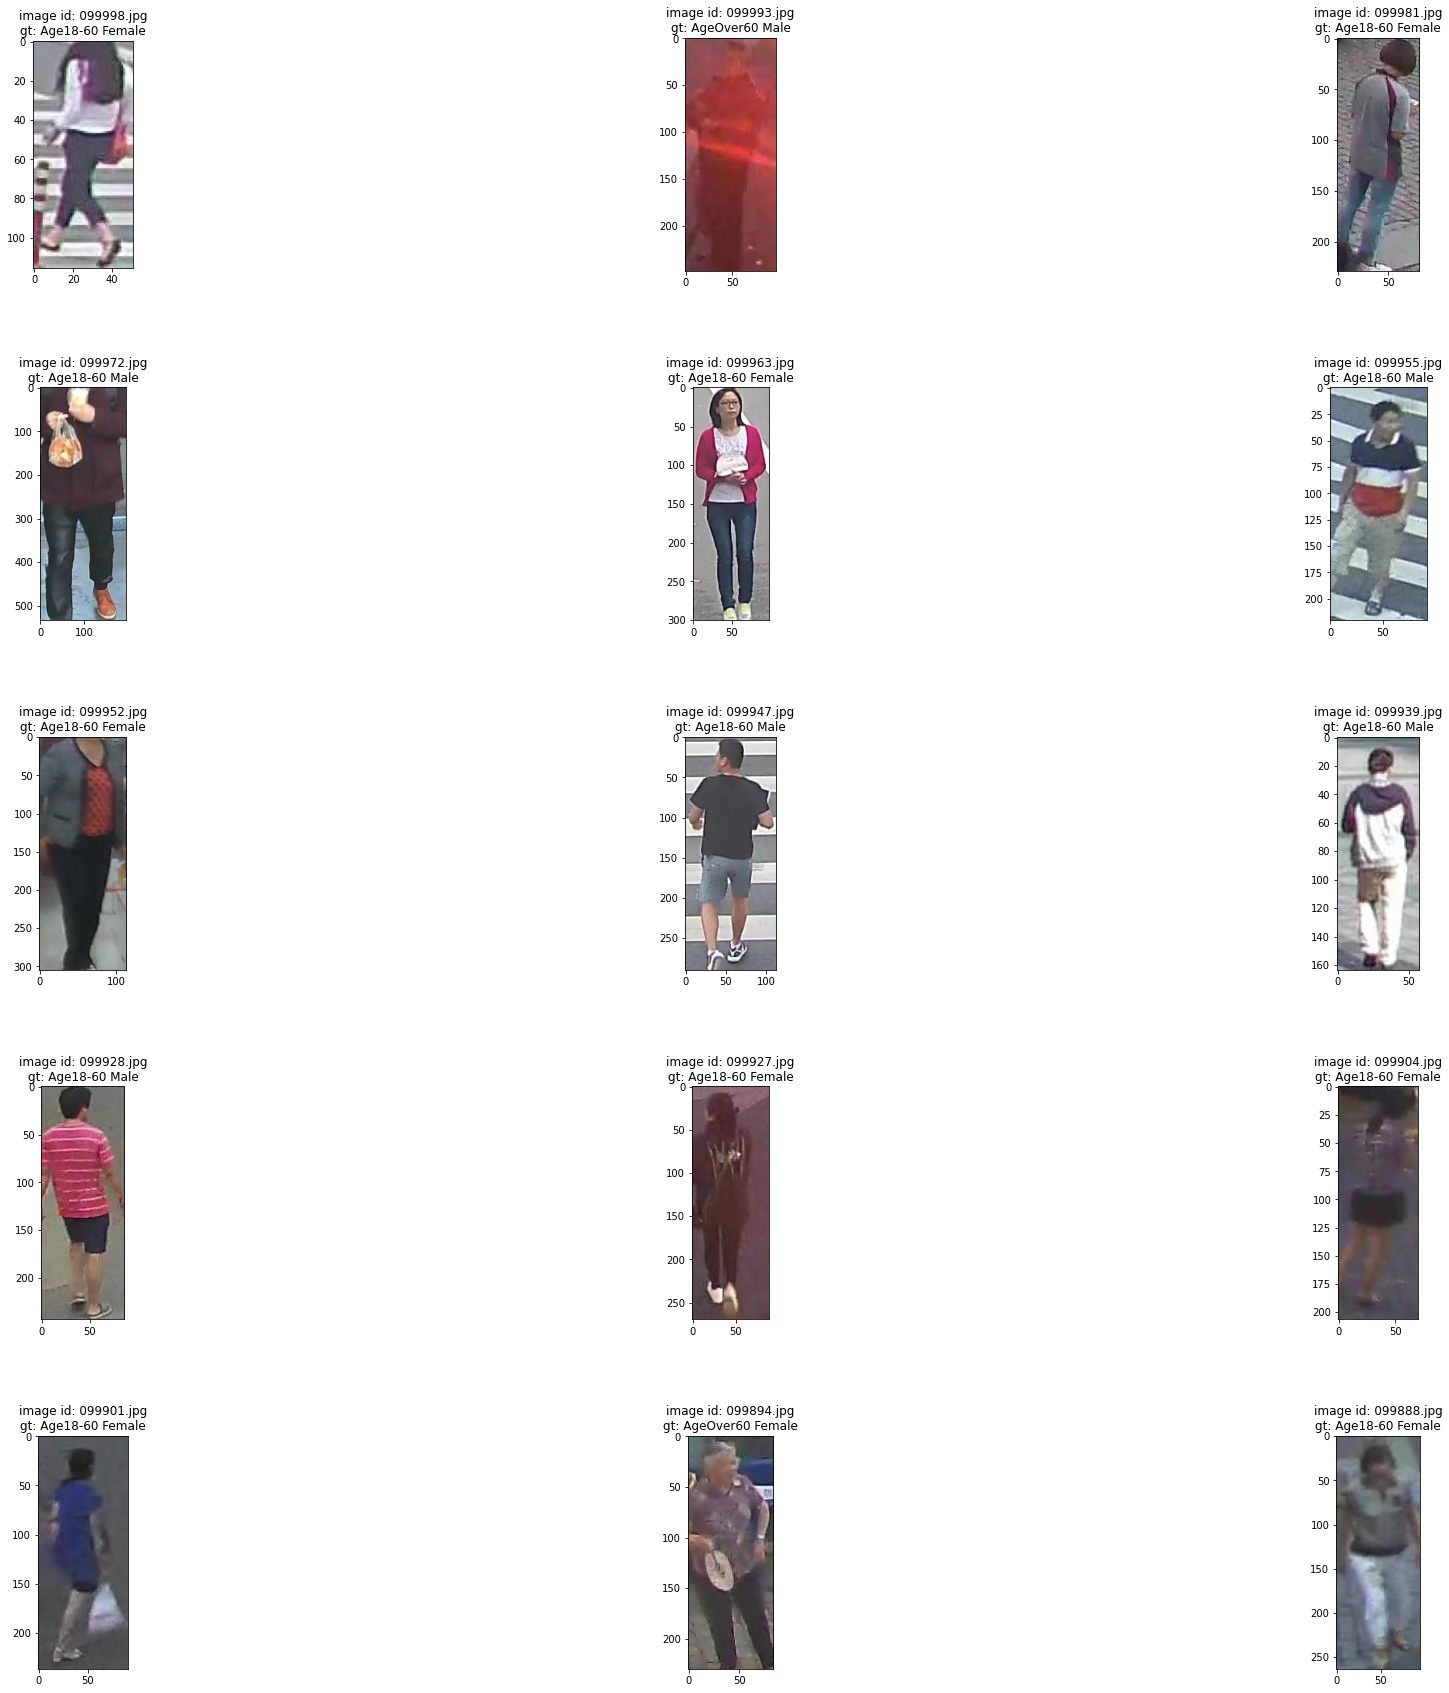

In [17]:
img_dir = f'../../data/{dataset}/raw/images'
plot_gt(df_test_pa100k, img_dir)

## RAP Dataset

Number of classes:  6


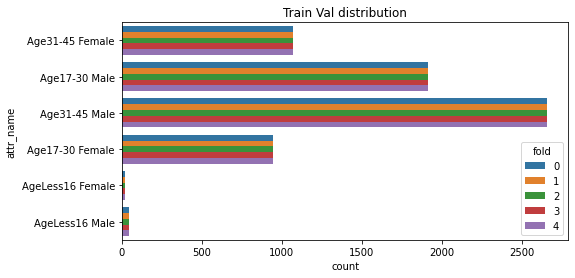

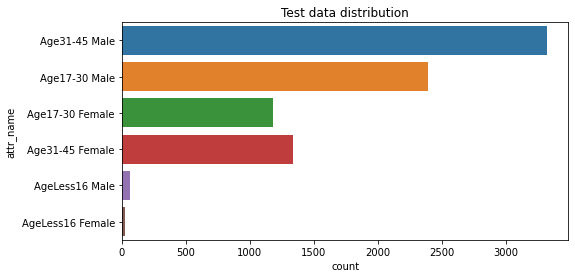

In [18]:
dataset = 'RAP'
version = 5
df_all_rap = pd.read_csv(f'../../data/{dataset}/split/{dataset.lower()}_v{version}.csv')
df_train_rap = pd.read_csv(f'../../data/{dataset}/split/train_v{version}.csv')
df_test_rap = pd.read_csv(f'../../data/{dataset}/split/test_v{version}.csv')

check_class_distribution(df_all_rap, df_train_rap, df_test_rap, val_fold=0)

In [19]:
df_all_rap[df_all_rap['image_id'] == 'CAM12_2014-02-22_20140222101459-20140222102047_tarid643_frame3937_line1.png']

image_id class_id  \
33333  CAM12_2014-02-22_20140222101459-20140222102047...      2 4   

           attr_name  fold  
33333  Age31-45 Male   NaN

In [20]:
df_all_rap[df_all_rap['class_id'].isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

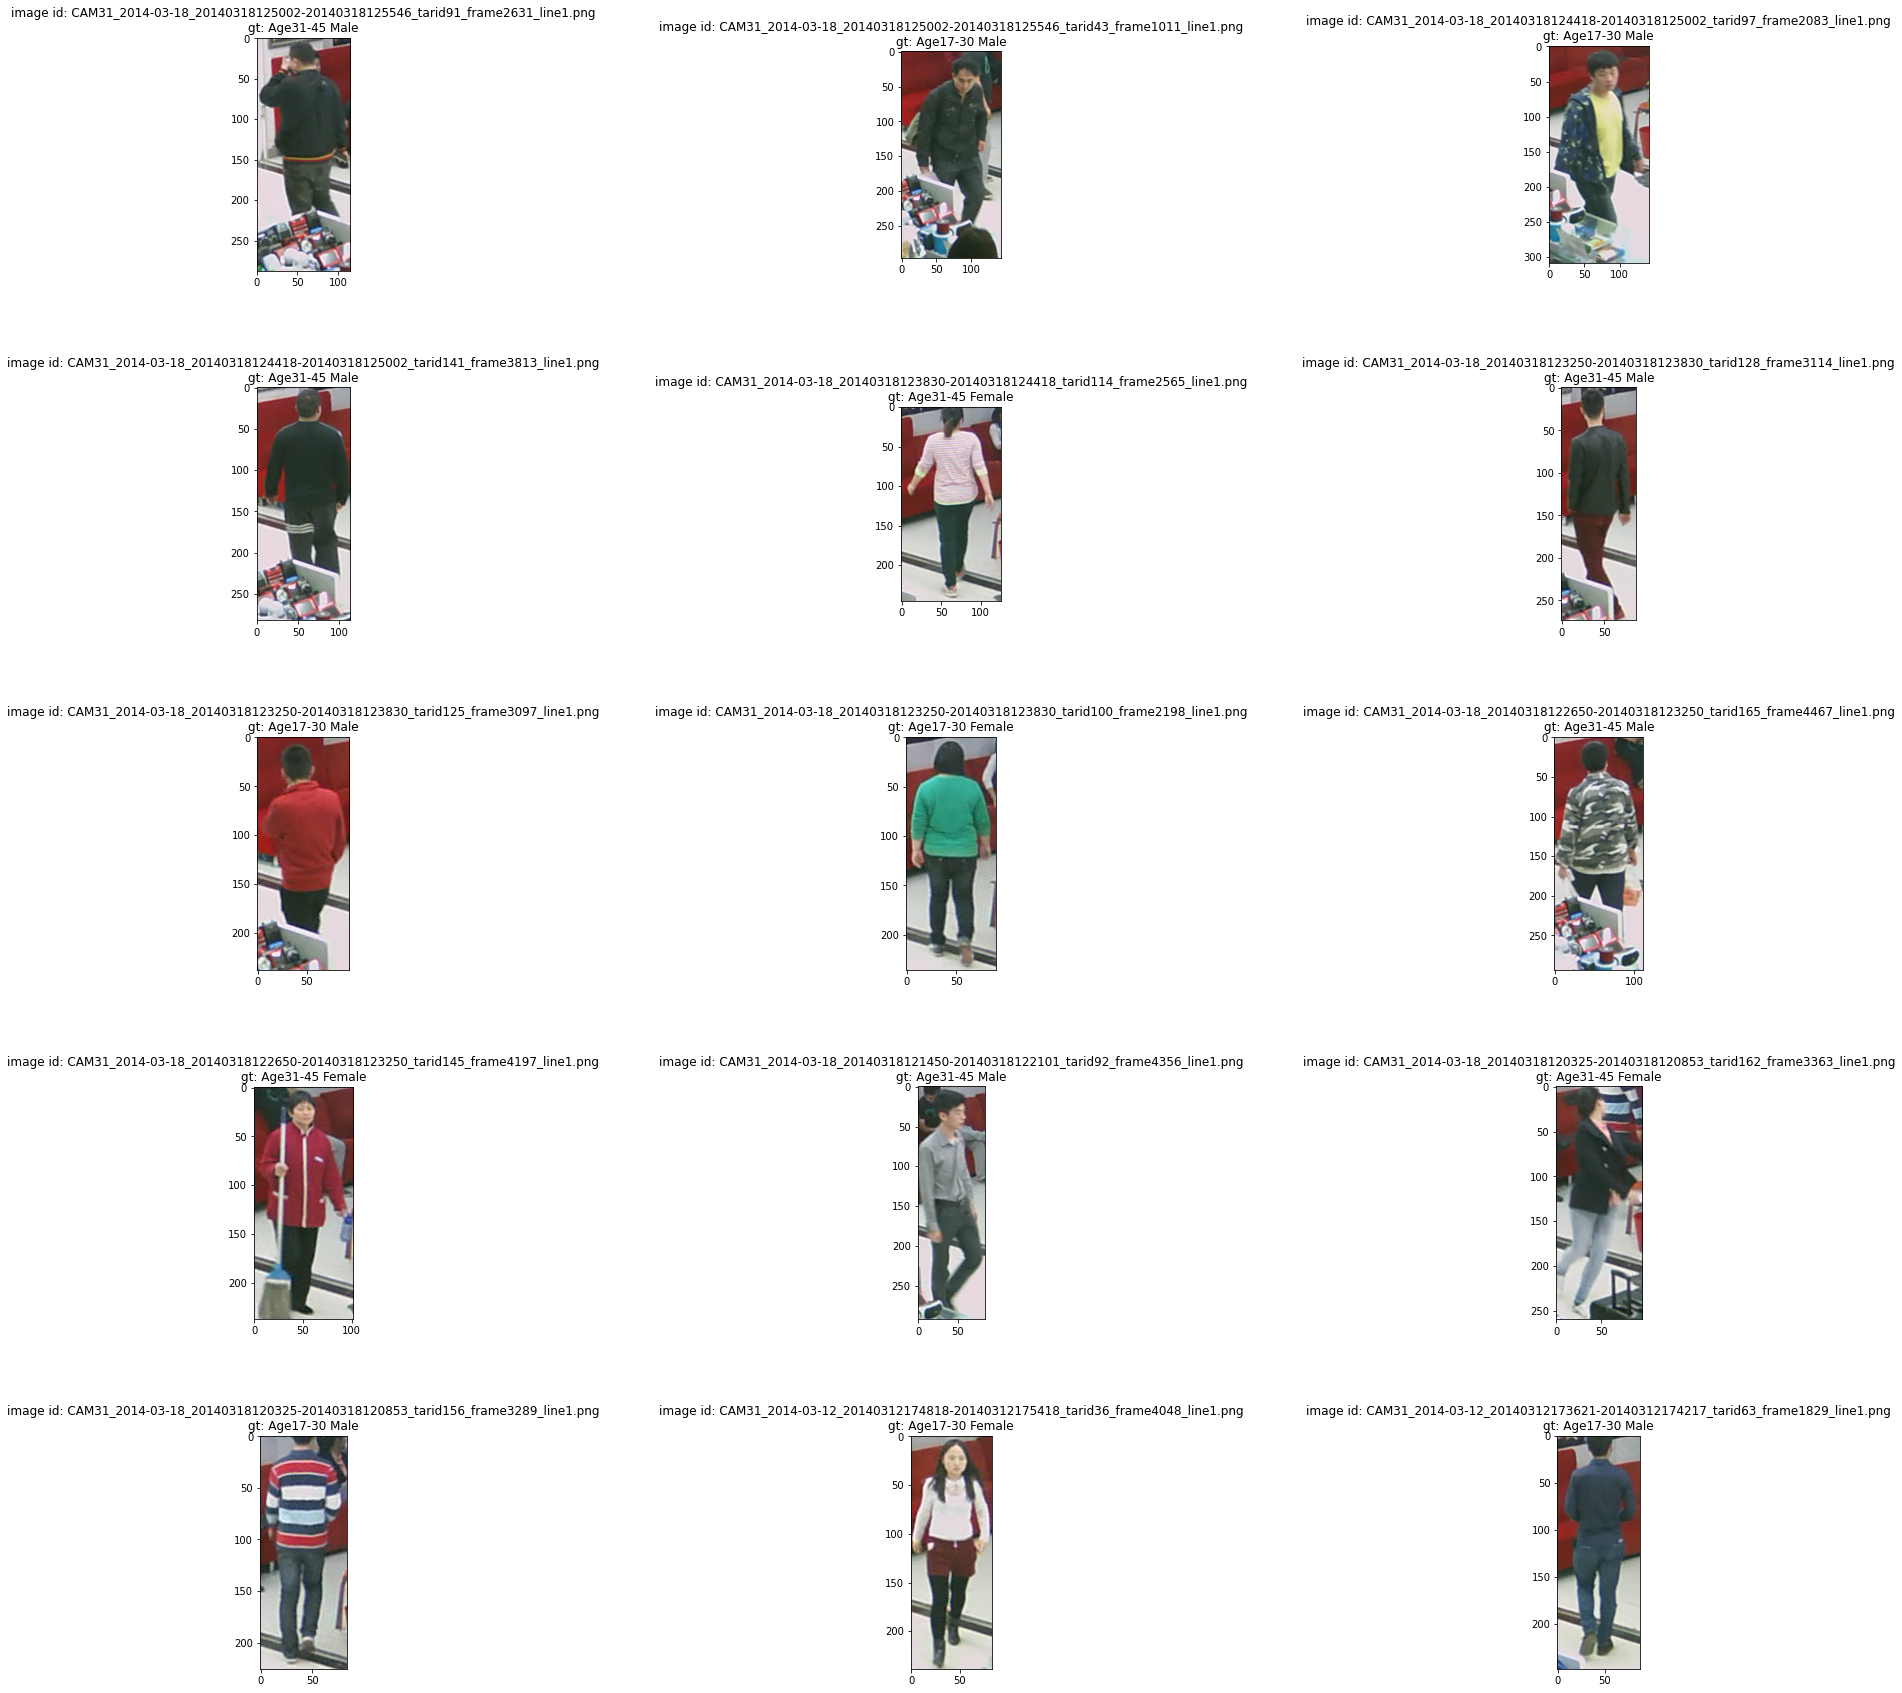

In [21]:
img_dir = f'../../data/{dataset}/raw/images'
plot_gt(df_test_rap, img_dir)

## RAP2 Dataset

Number of classes:  10


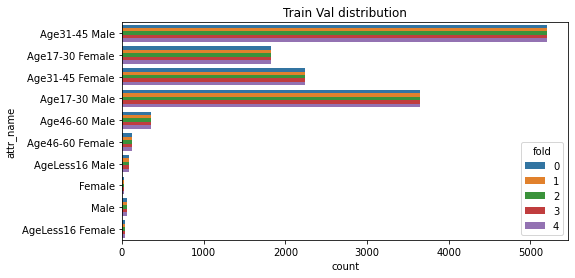

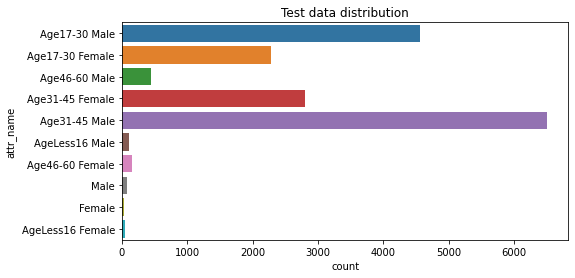

In [22]:
dataset = 'RAP2'
version = 5
df_all_rap2 = pd.read_csv(f'../../data/{dataset}/split/{dataset.lower()}_v{version}.csv')
df_train_rap2 = pd.read_csv(f'../../data/{dataset}/split/train_v{version}.csv')
df_test_rap2 = pd.read_csv(f'../../data/{dataset}/split/test_v{version}.csv')

check_class_distribution(df_all_rap2, df_train_rap2, df_test_rap2, val_fold=0)

In [23]:
print(len(df_all_rap2))
print(len(df_train_rap2))
print(len(df_test_rap2))

84928
67942
16986


In [24]:
df_all_rap2[df_all_rap2['class_id'].isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

In [25]:
df_all_rap2[df_all_rap2['fold'].isnull()]

image_id class_id  \
0      CAM31-2014-03-18-20140318125002-20140318125546...      2 4   
1      CAM31-2014-03-18-20140318125002-20140318125546...      2 5   
2      CAM31-2014-03-18-20140318125002-20140318125546...      2 4   
3      CAM31-2014-03-18-20140318125002-20140318125546...      1 5   
4      CAM31-2014-03-18-20140318125002-20140318125546...      2 5   
...                                                  ...      ...   
84923  CAM21-2014-04-24-20140424123431-20140424124255...      1 5   
84924  CAM14-2014-02-14-20140214144152-20140214145256...      1 5   
84925  CAM21-2014-04-24-20140424123431-20140424124255...      2 5   
84926  CAM21-2014-04-24-20140424122559-20140424123431...      1 5   
84927  CAM16-2014-03-27-20140327102842-20140327103442...      2 5   

             attr_name  fold  
0      Age31-45 Female   NaN  
1        Age31-45 Male   NaN  
2      Age31-45 Female   NaN  
3        Age17-30 Male   NaN  
4        Age31-45 Male   NaN  
...                ...   ...  
84923    Age17-30 Male   NaN  
84924    Age17-30 Male   NaN  
84925    Age31-45 Male   NaN  
84926    Age17-30 Male   NaN  
84927    Age31-45 Male   NaN  

[84928 rows x 4 columns]

In [26]:
df_train_rap2[df_train_rap2['class_id'].isnull()]

Empty DataFrame
Columns: [image_id, class_id, attr_name, fold]
Index: []

In [27]:
df_all_rap2['attr_name'].unique()

array(['Age31-45 Female', 'Age31-45 Male', 'Age17-30 Male',
       'Age17-30 Female', 'AgeLess16 Male', 'AgeLess16 Female',
       'Age46-60 Male', 'Male', 'Female', 'Age46-60 Female'], dtype=object)

In [28]:
len(df_all_rap2[df_all_rap2['attr_name']=='Age31-45 Age46-60 Female'])

0

In [29]:
len(df_all_rap2[df_all_rap2['attr_name']=='Age31-45 Age46-60 Female'])
img_dir = f'../data/{dataset}/{dataset[:-1]}_dataset'
plot_gt(df_all_rap2[df_all_rap2['attr_name']=='Age31-45 Age46-60 Female'], img_dir)

<Figure size 1800x2160 with 0 Axes>

## Merged Dataset

In [30]:
train_val = pd.read_csv('/data1/r_suzuki/pipeline/BaseModel/data/person_attribute/split/train_v1.csv')
test_df = pd.read_csv('/data1/r_suzuki/pipeline/BaseModel/data/person_attribute/split/test_v1.csv')
all_df = pd.read_csv('/data1/r_suzuki/pipeline/BaseModel/data/person_attribute/split/person_attribute.csv')

In [31]:
all_df.columns

Index(['image_id', 'class_id', 'attr_name', 'fold', 'source', 'image_path'], dtype='object')

In [32]:
all_df.fold.unique()

array([ 3.,  0.,  2.,  4.,  1., nan])

In [33]:
train_val.fold.unique()

array([3., 0., 2., 4., 1.])

In [34]:
test_df

image_id class_id  \
0                                             007904.jpg      0 6   
1                                             083564.jpg      0 6   
2                                             084078.jpg      0 6   
3                                             018432.jpg      0 6   
4                                             062979.jpg      4 5   
...                                                  ...      ...   
28641  CAM12-2014-02-15-20140215162235-20140215162835...      2 5   
28642  CAM21-2014-02-21-20140221123703-20140221124857...      1 5   
28643  CAM11-2014-03-03-20140303130519-20140303131123...      1 6   
28644  CAM16-2014-02-20-20140220170811-20140220171358...      2 6   
28645  CAM21-2014-03-27-20140327103247-20140327104603...      2 6   

              attr_name  source  \
0        AgeLess16 Male  PA100k   
1        AgeLess16 Male  PA100k   
2        AgeLess16 Male  PA100k   
3        AgeLess16 Male  PA100k   
4      AgeOver60 Female  PA100k   
...                 ...     ...   
28641   Age31-45 Female    RAP2   
28642   Age17-30 Female    RAP2   
28643     Age17-30 Male    RAP2   
28644     Age31-45 Male    RAP2   
28645     Age31-45 Male    RAP2   

                                              image_path  
0      /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
1      /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
2      /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
3      /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
4      /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
...                                                  ...  
28641  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
28642  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
28643  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
28644  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
28645  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  

[28646 rows x 5 columns]

In [35]:
assert len(all_df) == all_df.image_id.nunique()

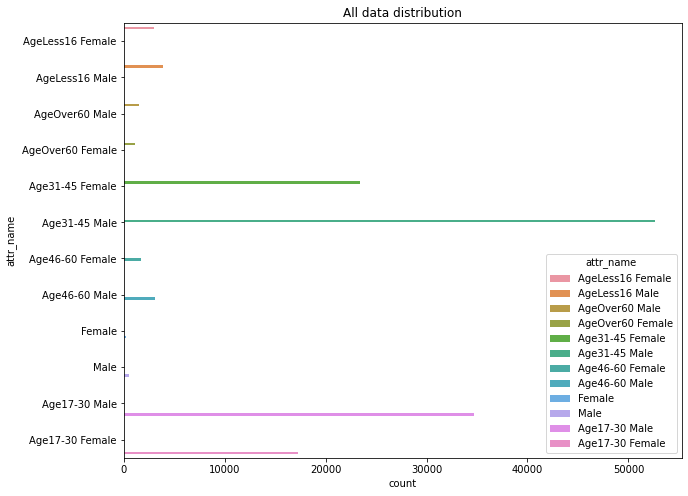

In [36]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="attr_name", data=all_df, hue='attr_name');

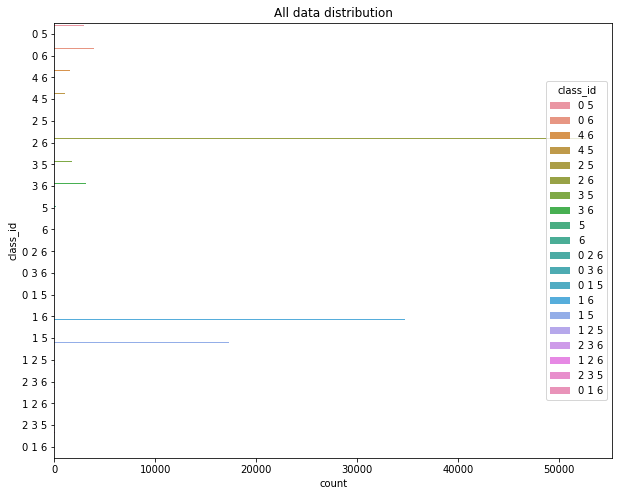

In [37]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="class_id", data=all_df, hue='class_id');

In [38]:
len(all_df[all_df['attr_name']=='Male'])

526

In [39]:
all_df[all_df['fold'].isnull()]

image_id class_id  \
5725                                           007904.jpg      0 6   
5726                                           083564.jpg      0 6   
5727                                           084078.jpg      0 6   
5728                                           018432.jpg      0 6   
5729                                           062979.jpg      4 5   
...                                                   ...      ...   
143225  CAM12-2014-02-15-20140215162235-20140215162835...      2 5   
143226  CAM21-2014-02-21-20140221123703-20140221124857...      1 5   
143227  CAM11-2014-03-03-20140303130519-20140303131123...      1 6   
143228  CAM16-2014-02-20-20140220170811-20140220171358...      2 6   
143229  CAM21-2014-03-27-20140327103247-20140327104603...      2 6   

               attr_name  fold  source  \
5725      AgeLess16 Male   NaN  PA100k   
5726      AgeLess16 Male   NaN  PA100k   
5727      AgeLess16 Male   NaN  PA100k   
5728      AgeLess16 Male   NaN  PA100k   
5729    AgeOver60 Female   NaN  PA100k   
...                  ...   ...     ...   
143225   Age31-45 Female   NaN    RAP2   
143226   Age17-30 Female   NaN    RAP2   
143227     Age17-30 Male   NaN    RAP2   
143228     Age31-45 Male   NaN    RAP2   
143229     Age31-45 Male   NaN    RAP2   

                                               image_path  
5725    /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
5726    /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
5727    /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
5728    /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
5729    /data1/r_suzuki/pipeline/BaseModel/data/PA100k...  
...                                                   ...  
143225  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
143226  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
143227  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
143228  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  
143229  /data1/r_suzuki/pipeline/BaseModel/data/RAP2/r...  

[28646 rows x 6 columns]

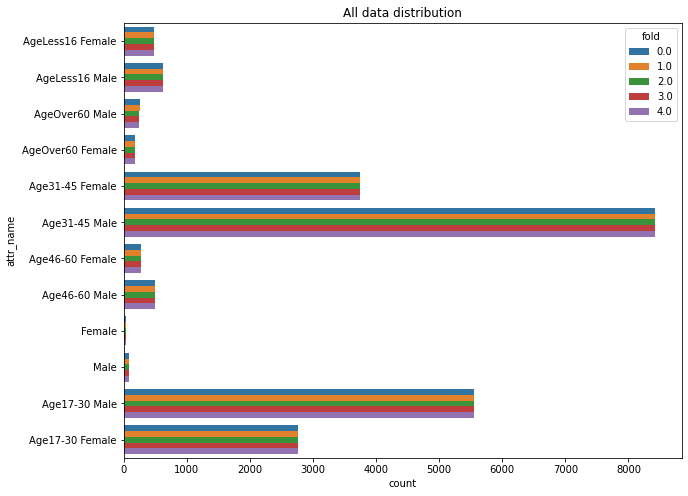

In [40]:
plt.figure(figsize=(10, 8))
plt.title('All data distribution')
sn.countplot(y="attr_name", data=all_df, hue='fold');

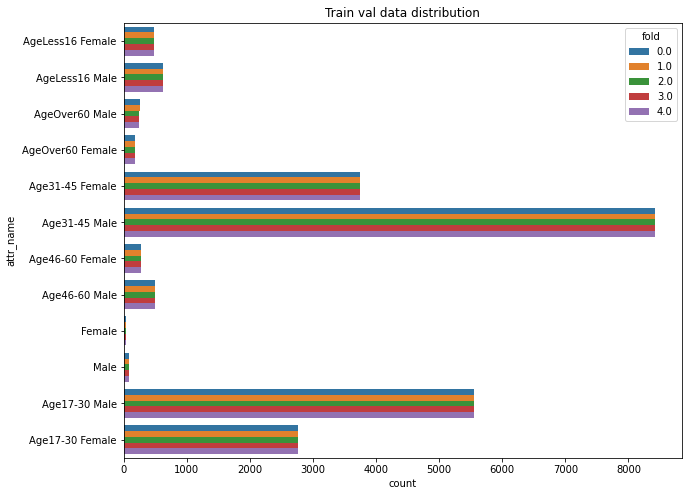

In [41]:
plt.figure(figsize=(10, 8))
plt.title('Train val data distribution')
sn.countplot(y="attr_name", data=train_val, hue='fold');

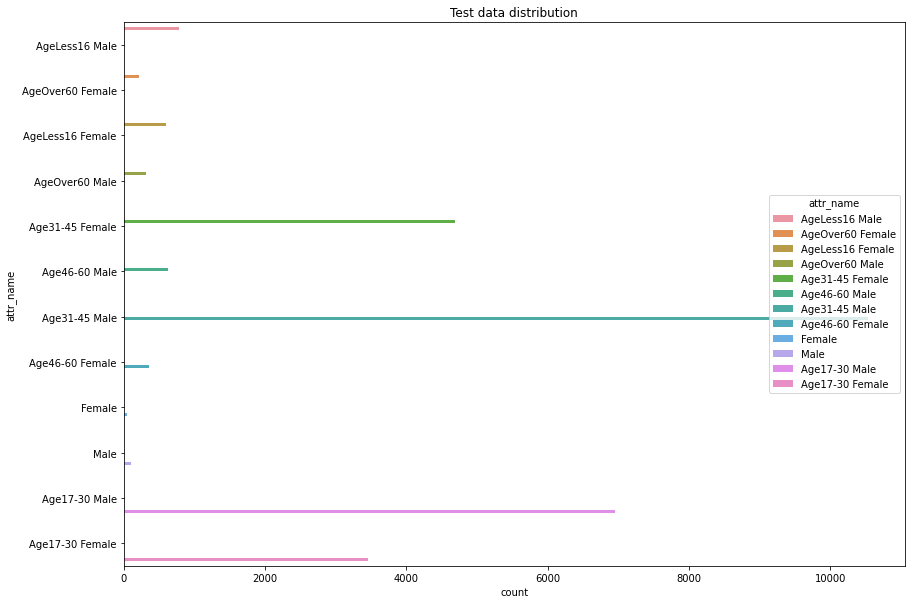

In [42]:
plt.figure(figsize=(14, 10))
plt.title('Test data distribution')
sn.countplot(y="attr_name", data=test_df, hue='attr_name');

In [43]:
len(all_df[all_df['fold'].isnull()]) / len(all_df)

0.2

In [44]:
for i in range(5):
    fold_ratio = len(train_val[train_val['fold']==i]) / len(train_val) *100
    print(f'Fold {i}: {fold_ratio} %')

Fold 0: 20.000174544439016 %
Fold 1: 20.001047266634085 %
Fold 2: 20.000174544439016 %
Fold 3: 19.999301822243943 %
Fold 4: 19.999301822243943 %


In [45]:
print('Test length:', len(test_df) / len(all_df) *100, '%')

Test length: 20.0 %


In [46]:
len(all_df)

143230

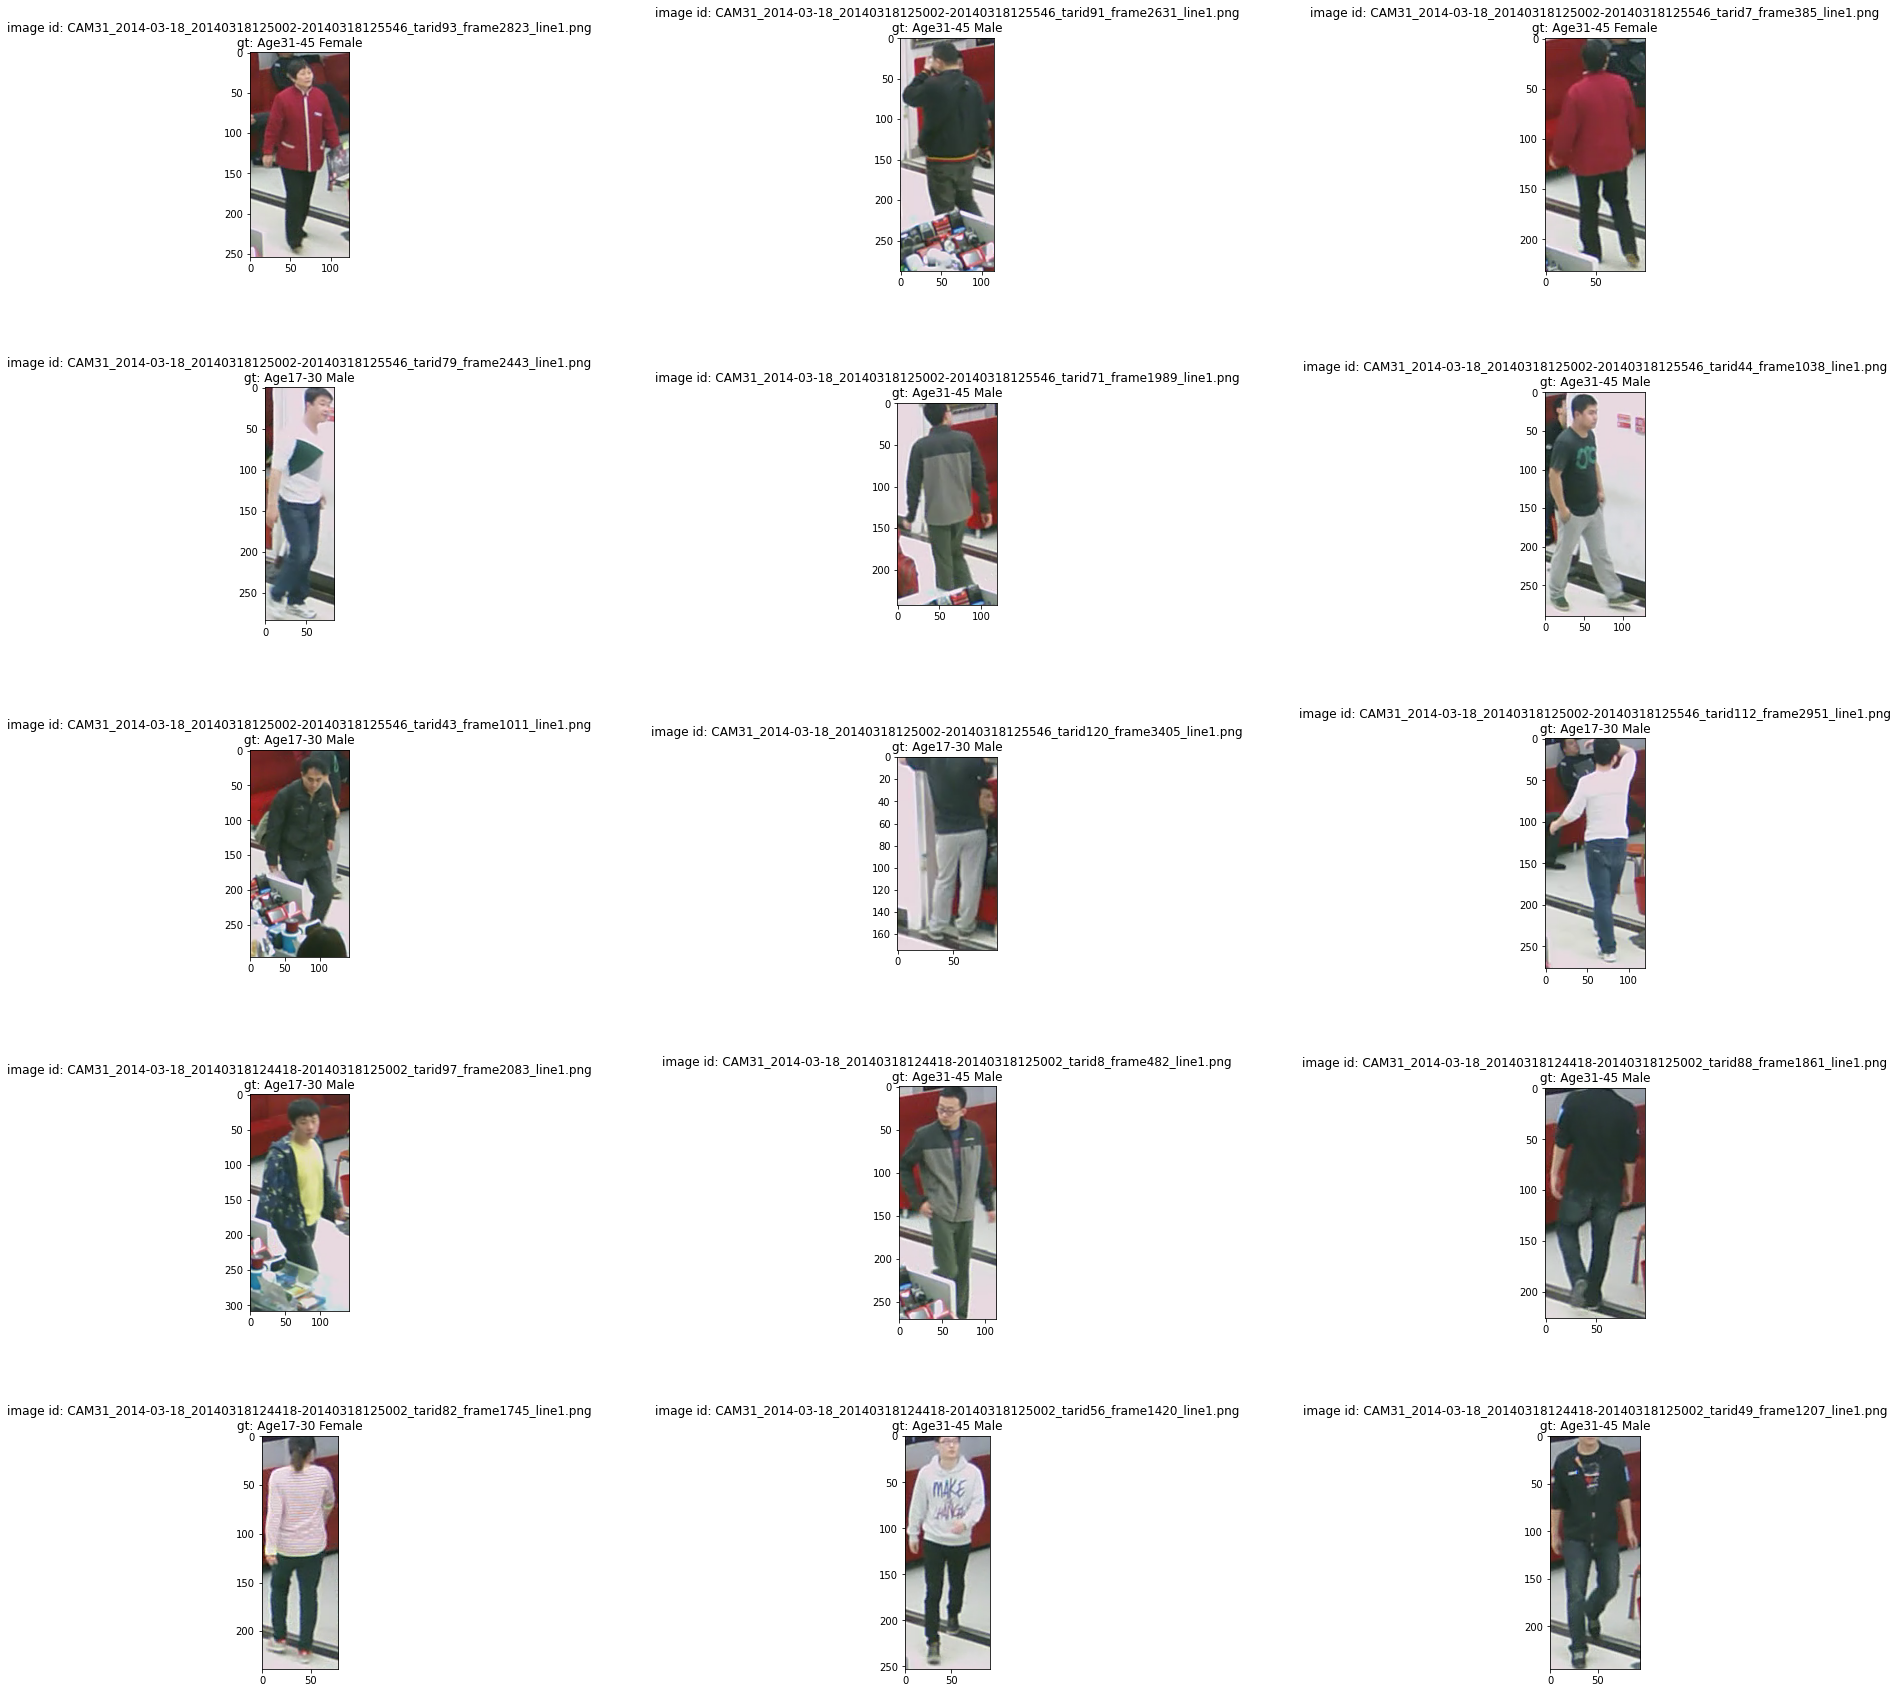

In [47]:
dataset = 'person_attribute'
img_dir = f'../../data/{dataset}/raw/images'
plot_gt(all_df, img_dir)

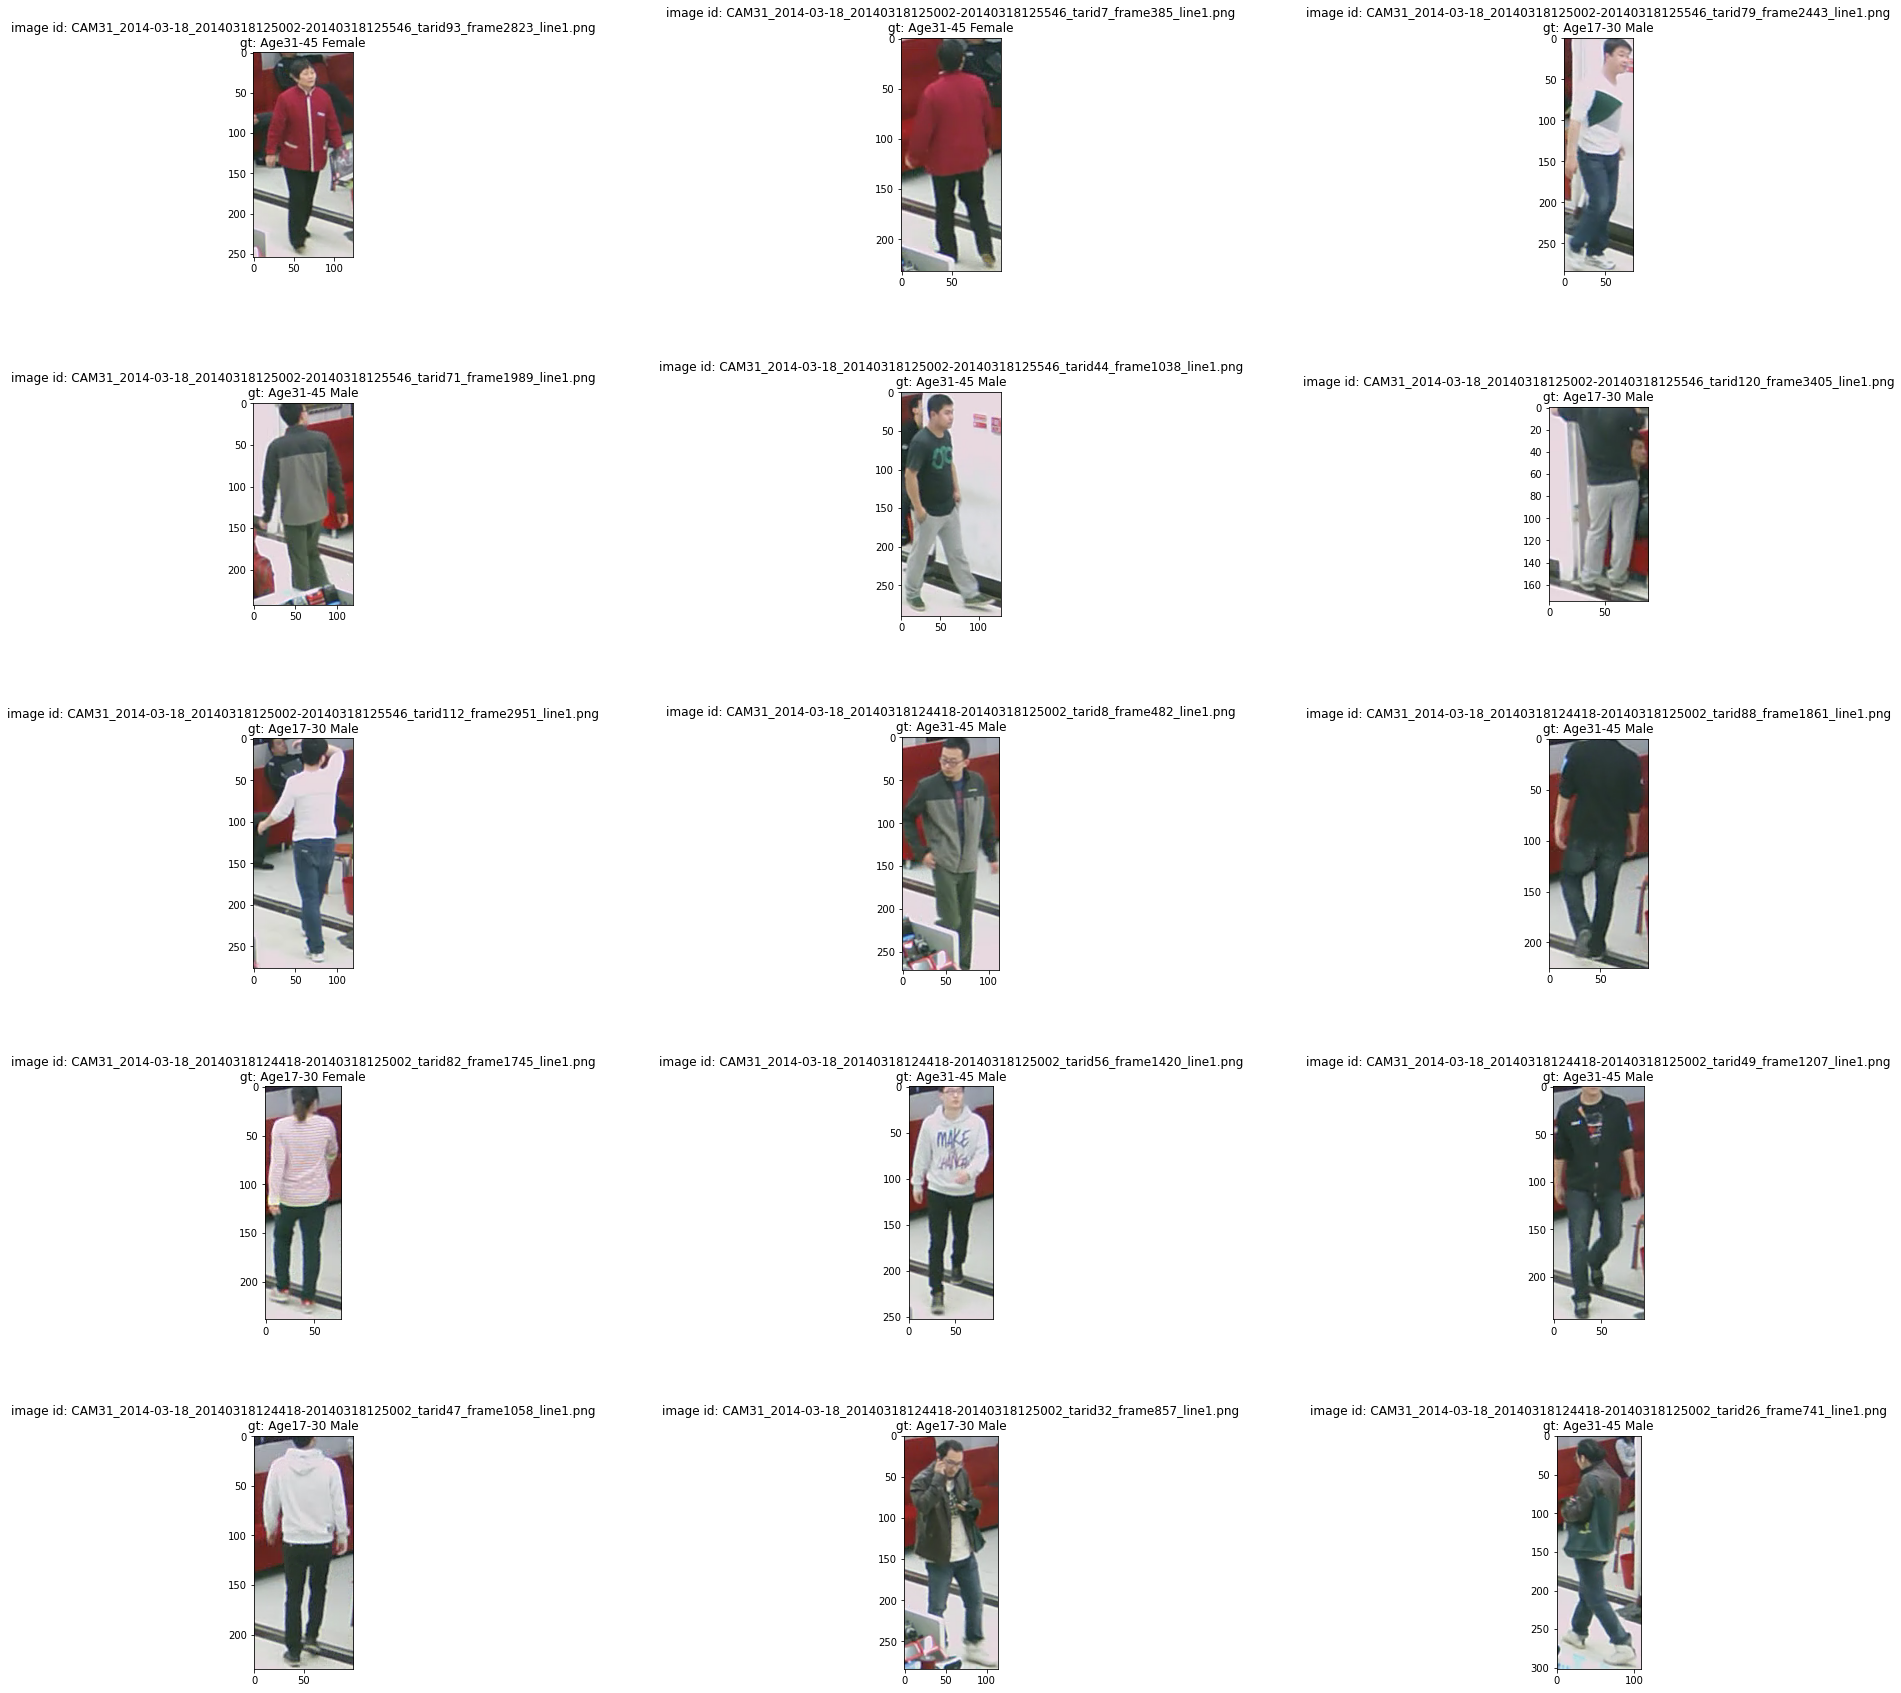

In [48]:
dataset = 'person_attribute'
img_dir = f'../../data/{dataset}/raw/images'
plot_gt(train_val, img_dir)

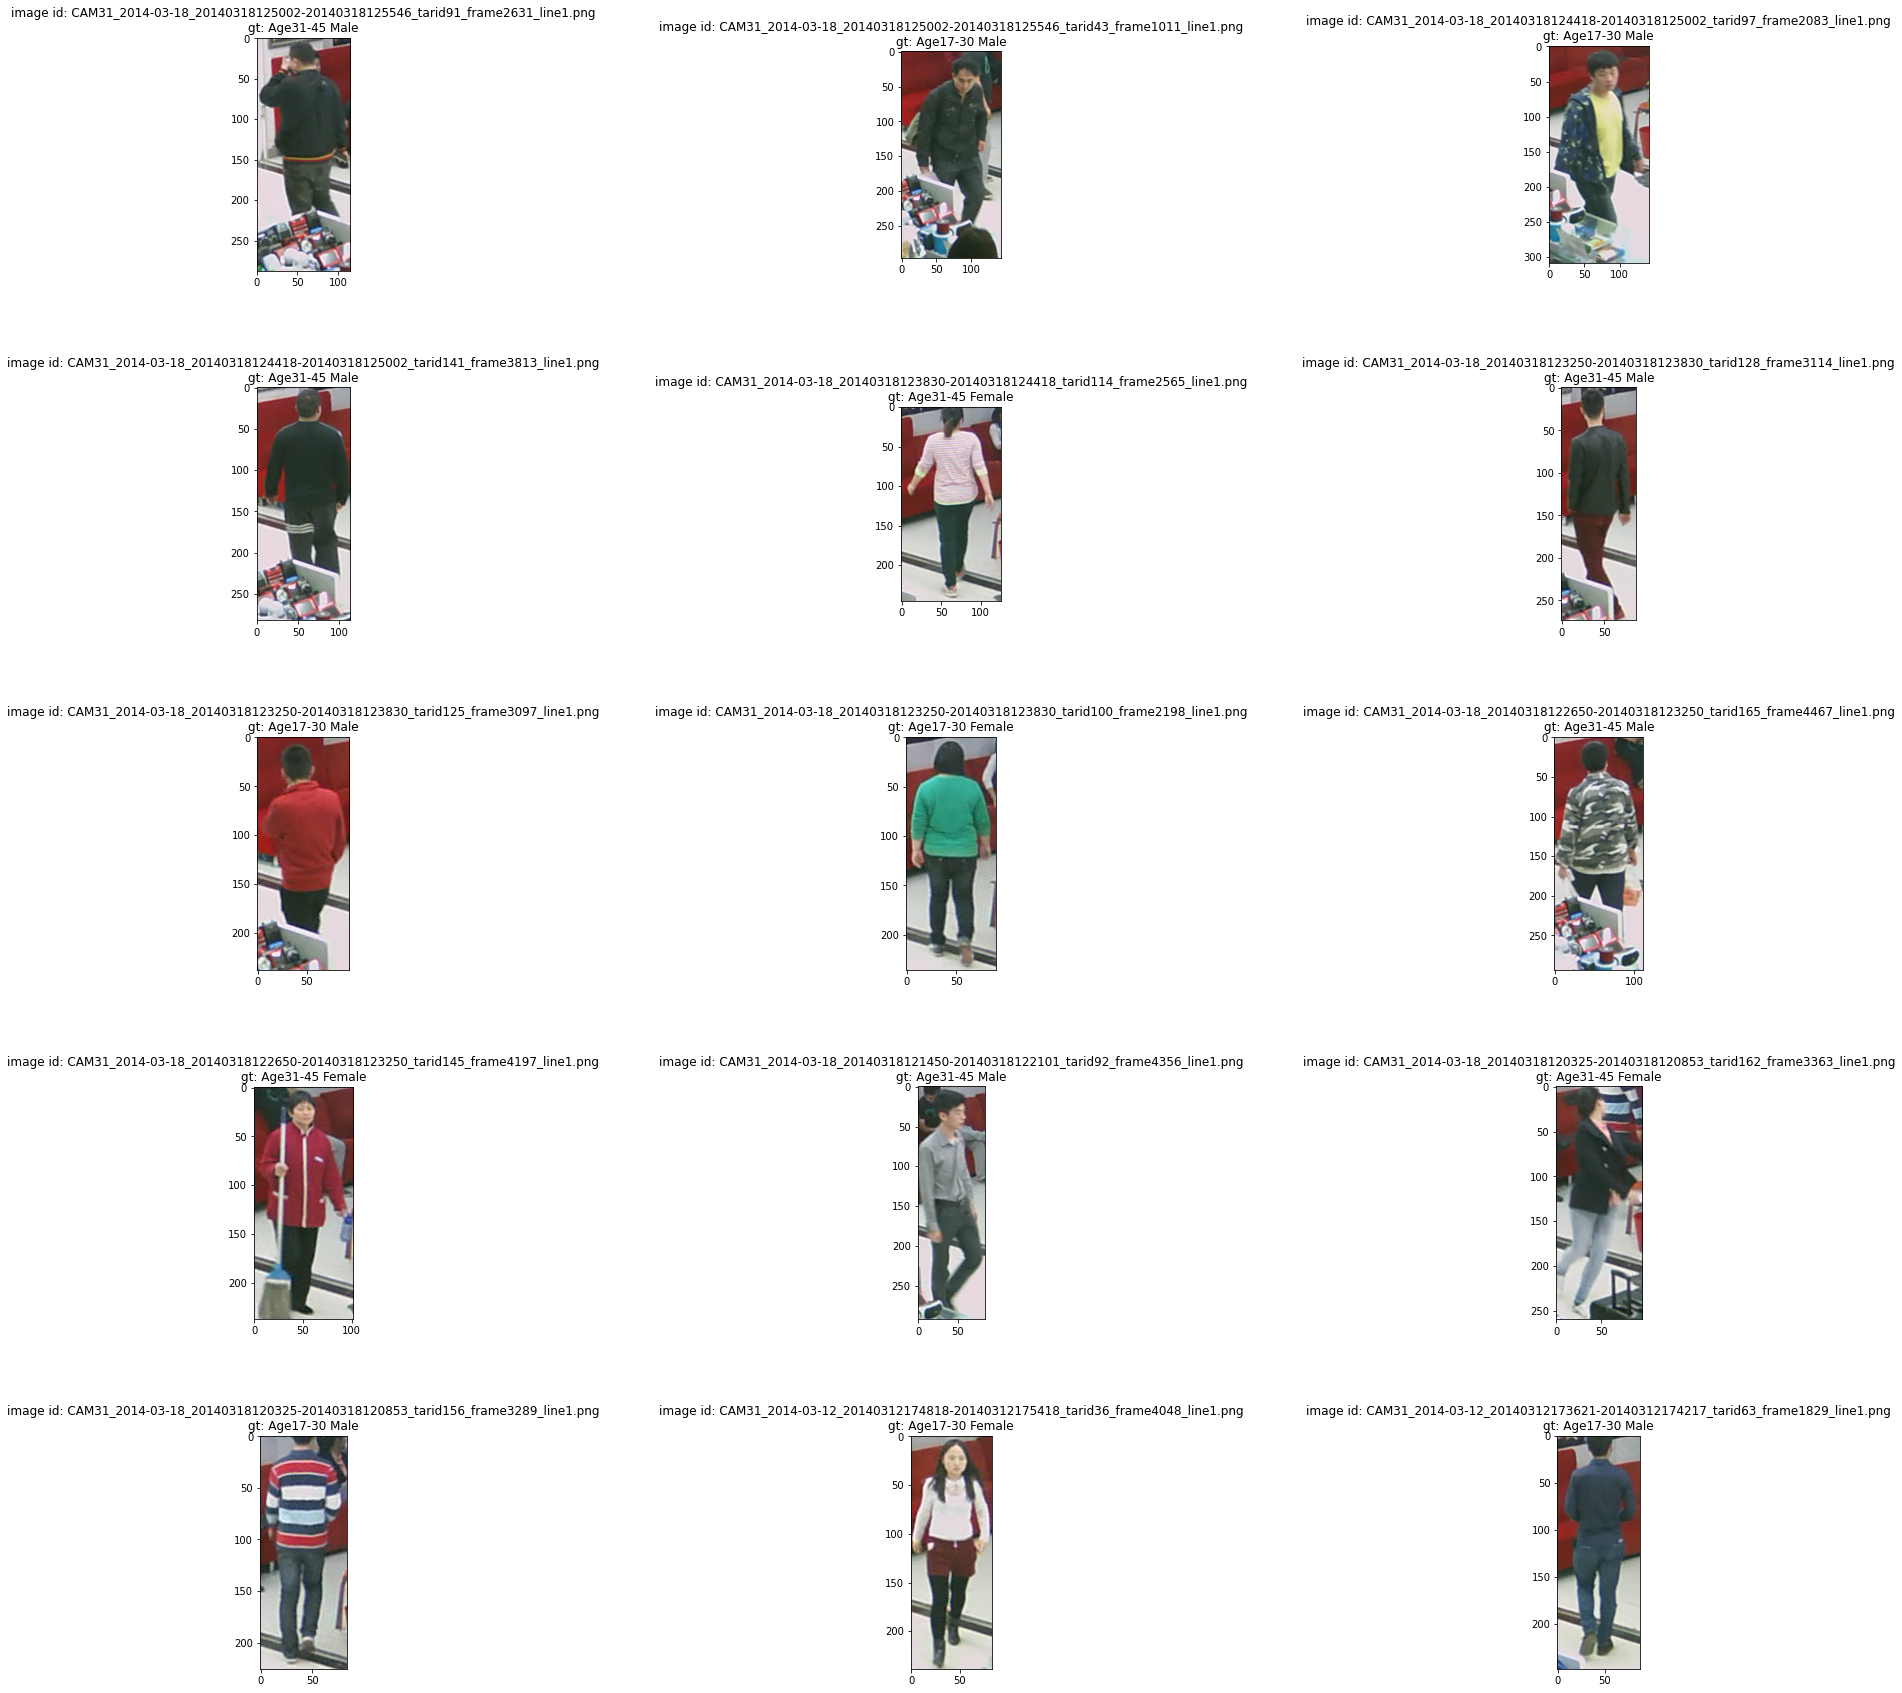

In [49]:
dataset = 'person_attribute'
img_dir = f'../../data/{dataset}/raw/images'
plot_gt(test_df, img_dir)